In [1]:
# ===============================
# 🌾 Crop Price Prediction Model (Jupyter Notebook Version - Random Forest Only)
# ===============================

# 1. Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv("Datasets/crop_price_dataset_expanded.csv")
df["Date"] = pd.to_datetime(df["Date"])
print("✅ Dataset loaded successfully")
display(df.head())

# ===============================
# 3. Feature Engineering
# ===============================
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

# Encode Crop & Market
le_crop = LabelEncoder()
le_market = LabelEncoder()
df["CropEncoded"] = le_crop.fit_transform(df["Crop"])
df["MarketEncoded"] = le_market.fit_transform(df["Market"])

# Features & Target
features = [
    "Rainfall(mm)", 
    "Supply(quintals)", 
    "DemandIndex", 
    "Year", 
    "Month", 
    "Day", 
    "CropEncoded", 
    "MarketEncoded"
]
X = df[features]
y = df["ModalPrice"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


✅ Dataset loaded successfully


,Date,Crop,Market,Rainfall(mm),Supply(quintals),DemandIndex,MinPrice,MaxPrice,ModalPrice
0,2015-01-01,Rice,Alipurduar,2.73,524,0.61,40,50,45
1,2015-01-01,Wheat,Alipurduar,7.64,539,0.58,24,29,26
2,2015-01-01,Maize,Alipurduar,0.91,664,0.59,22,27,24
3,2015-01-01,Jute,Alipurduar,6.92,237,0.36,33,41,36
4,2015-01-01,Potato,Alipurduar,4.83,1117,0.56,18,21,20


In [ ]:
# ===============================
# 4. Train Random Forest Model
# ===============================
model = RandomForestRegressor(
    n_estimators=200, 
    max_depth=20, 
    n_jobs=-1, 
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Accuracy in percentage
accuracy = r2 * 100

print("\n📊 Random Forest Performance:")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")
print(f"✅ Accuracy: {accuracy:.2f}%")

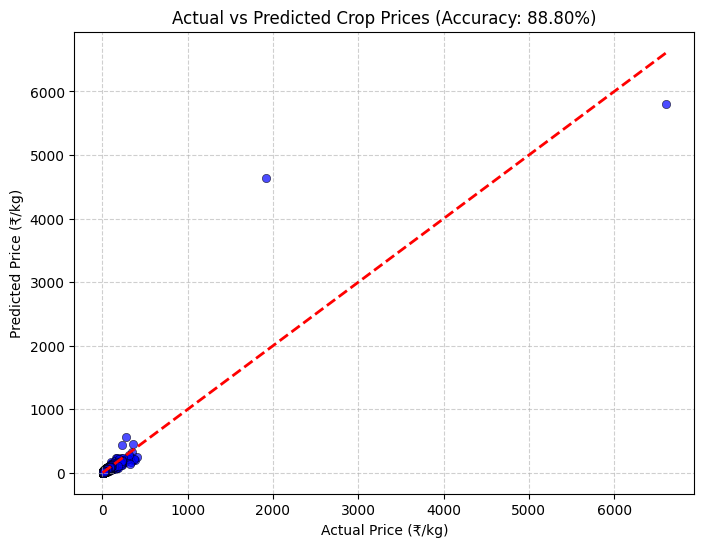

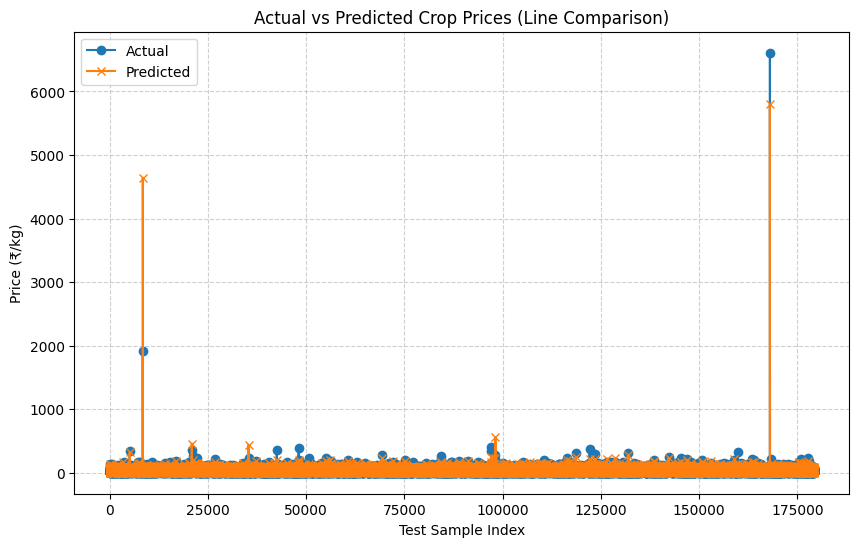

In [6]:
# ===============================
# 5. Visualization
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)  # perfect fit line
plt.xlabel("Actual Price (₹/kg)")
plt.ylabel("Predicted Price (₹/kg)")
plt.title(f"Actual vs Predicted Crop Prices (Accuracy: {accuracy:.2f}%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Line chart: Compare Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(list(range(len(y_test))), y_test.values, label="Actual", marker="o")
plt.plot(list(range(len(y_pred))), y_pred, label="Predicted", marker="x")
plt.xlabel("Test Sample Index")
plt.ylabel("Price (₹/kg)")
plt.title("Actual vs Predicted Crop Prices (Line Comparison)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [2]:
# ===============================
# 6. Save Model
# ===============================
export_obj = {
    "model": model,
    "scaler": scaler,
    "crop_encoder": le_crop,
    "market_encoder": le_market,
    "features": features
}

joblib.dump(export_obj, "RandomForest_crop_price_model.pkl")
print("\n✅ Random Forest model saved as RandomForest_crop_price_model.pkl")


✅ Random Forest model saved as RandomForest_crop_price_model.pkl


In [3]:
# ===============================
# 7. Prediction Interface
# ===============================
# Reload model
model_obj = joblib.load("RandomForest_crop_price_model.pkl")
model = model_obj["model"]
scaler = model_obj["scaler"]
crop_encoder = model_obj["crop_encoder"]
market_encoder = model_obj["market_encoder"]
features = model_obj["features"]

print("\n🌾 Crop Price Prediction")
input_crop = input("Enter crop name (Rice, Wheat, Maize, Jute, Potato, Mustard, Pulses, Sugarcane, Vegetables, Fruits): ")
input_market = input("Enter market/district: ")
input_rainfall = float(input("Enter rainfall in mm: "))
input_supply = float(input("Enter supply in quintals: "))
input_demand = float(input("Enter demand index (0-1): "))
input_month = int(input("Enter month (1-12): "))
input_day = int(input("Enter day (1-31): "))

# Encode crop & market
crop_encoded = crop_encoder.transform([input_crop])[0]
market_encoded = market_encoder.transform([input_market])[0]

# Create input dataframe with Year fixed (2025 for prediction)
input_df = pd.DataFrame([{
    "Rainfall(mm)": input_rainfall,
    "Supply(quintals)": input_supply,
    "DemandIndex": input_demand,
    "Year": 2025,
    "Month": input_month,
    "Day": input_day,
    "CropEncoded": crop_encoded,
    "MarketEncoded": market_encoded
}])

# Scale features
X_new = scaler.transform(input_df[features])

# Predict
predicted_price = model.predict(X_new)[0]
print(f"\n💰 Predicted {input_crop} price in {input_market}: ₹{predicted_price:.2f}/kg")


🌾 Crop Price Prediction


Enter crop name (Rice, Wheat, Maize, Jute, Potato, Mustard, Pulses, Sugarcane, Vegetables, Fruits):  Potato
Enter market/district:  Kolkata
Enter rainfall in mm:  3.3
Enter supply in quintals:  260
Enter demand index (0-1):  0.7
Enter month (1-12):  1
Enter day (1-31):  2



💰 Predicted Potato price in Kolkata: ₹53.30/kg
